- Content: Pearson correlation, average, standard deviation, and confidence interval for coookbook and newspaper recipes
- Author: Teresa Paccosi
- Paper: 'Detecting Changing Culinary Trends Through Historical Recipes' by Gauri Bhagwat, Marieke van Erp, Teresa Paccosi, and Rik Hoekstra

In [ ]:
#COOKBOOKS editions

from scipy.stats import pearsonr
import pandas as pd

def extract_ingredient_count(file_path):
    df = pd.read_csv(file_path)
    df['ingredient_count'] = df['Ingredients'].apply(lambda x: len(str(x).split(',')))
    return df

def calculate_average_ingredient_count(df):
    avg_ingredient_count = df['ingredient_count'].mean()
    return avg_ingredient_count

def calculate_correlation_average_ingredient_count(period_files):
    periods = [] 
    avg_ingredient_counts = []
    
    for file in period_files:
        df = extract_ingredient_count(file)
        avg_ingredient_count = calculate_average_ingredient_count(df)
        period = int(file.split('_')[0])
        
        periods.append(period)
        avg_ingredient_counts.append(avg_ingredient_count)
    
    correlation, p_value = pearsonr(periods, avg_ingredient_counts)
    return correlation, p_value

period_files = ['1910_ingredients.csv', '1912_ingredients.csv', '1925_ingredients.csv', '1940_ingredients.csv']

# period_files = ['1910_ingredients.csv', '1912_ingredients.csv', '1925_ingredients.csv', '1932_ingredients.csv', 
#                 '1938_ingredients.csv', '1939_ingredients.csv', '1940_ingredients.csv']

correlation, p_value = calculate_correlation_average_ingredient_count(period_files)

print(f"Correlation between year and average number of ingredients per recipe: {correlation:.3f}")
print(f"p-value of the correlation: {p_value:.3f}")


Correlation between year and average number of ingredients per recipe: 0.947
p-value of the correlation: 0.053


In [ ]:
# ALL COOKBOOKS

from scipy.stats import pearsonr
import pandas as pd

def extract_ingredient_count(file_path):
    df = pd.read_csv(file_path)
    df['ingredient_count'] = df['Ingredients'].apply(lambda x: len(str(x).split(',')))
    return df

def calculate_average_ingredient_count(df):
    avg_ingredient_count = df['ingredient_count'].mean()
    return avg_ingredient_count

def calculate_correlation_average_ingredient_count(period_files):
    periods = [] 
    avg_ingredient_counts = []
    
    for file in period_files:
        df = extract_ingredient_count(file)
        avg_ingredient_count = calculate_average_ingredient_count(df)
        period = int(file.split('_')[0])
        
        periods.append(period)
        avg_ingredient_counts.append(avg_ingredient_count)
    
    correlation, p_value = pearsonr(periods, avg_ingredient_counts)
    return correlation, p_value

# period_files = ['1910_ingredients.csv', '1912_ingredients.csv', '1925_ingredients.csv', '1940_ingredients.csv']

period_files = ['1910_ingredients.csv', '1912_ingredients.csv', '1925_ingredients.csv', '1932_ingredients.csv', 
                '1938_ingredients.csv', '1939_ingredients.csv', '1940_ingredients.csv']

correlation, p_value = calculate_correlation_average_ingredient_count(period_files)

print(f"Correlation between year and average number of ingredients per recipe: {correlation:.3f}")
print(f"p-value of the correlation: {p_value:.3f}")


Correlation between year and average number of ingredients per recipe: -0.163
p-value of the correlation: 0.727


In [ ]:
#NEWSPAPER RECIPES

import pandas as pd
from scipy.stats import pearsonr

def extract_ingredient_count(file_path):
    df = pd.read_csv(file_path)
    df['ingredient_count'] = df['Ingredients'].apply(lambda x: len(str(x).split(',')))
    df['year'] = pd.to_datetime(df['date']).dt.year
    return df

def calculate_correlation(file_path):
    df = extract_ingredient_count(file_path)
    avg_ingredient_count_per_year = df.groupby('year')['ingredient_count'].mean()

    correlation, p_value = pearsonr(avg_ingredient_count_per_year.index, avg_ingredient_count_per_year)
    
    return correlation, p_value

file_path = 'recipe_web.csv' 

correlation, p_value = calculate_correlation(file_path)

print(f"Correlation between year and average number of ingredients per recipe: {correlation:.3f}")
print(f"p-value: {p_value:.3f}")

Correlation between year and average number of ingredients per recipe: 0.844
p-value: 0.000


In [ ]:
dfs = [pd.read_csv(pf) for pf in period_files]

years = [int(pf[:4]) for pf in period_files]
for yi, year in enumerate(years):
    dfs[yi]['Year'] = year

combined_df = pd.concat([df[['Year', 'Title', 'Ingredients']] for df in dfs])

In [ ]:
combined_df.describe()
combined_df['ingredient_count'] = combined_df.Ingredients.apply(lambda x: len(x.split(', ')) if pd.isna(x) == False else x)
combined_df
combined_df.Year.value_counts()
selected_years = [1910, 1912, 1925, 1940]

In [24]:
combined_df.Year.value_counts()
combined_df.ingredient_count.value_counts()
combined_df = combined_df[(combined_df.Year.notna()) & (combined_df.ingredient_count.notna())]
combined_df.shape

(6673, 4)

<Axes: xlabel='Year', ylabel='ingredient_count'>

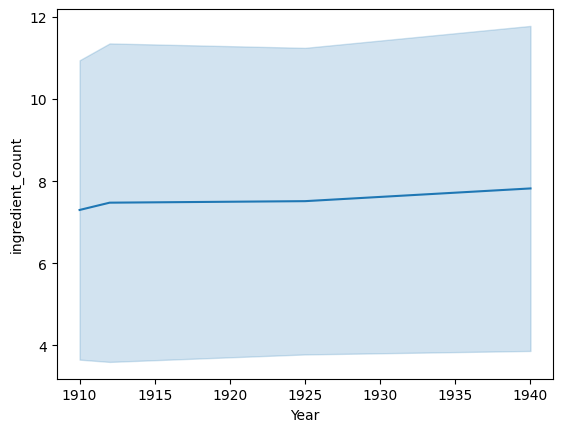

In [63]:
# average+standard deviation cookbook recipes (editions)

sns.lineplot(data=combined_df[combined_df.Year.isin(selected_years)], x='Year', y='ingredient_count', errorbar='sd')

<Axes: xlabel='Year', ylabel='ingredient_count'>

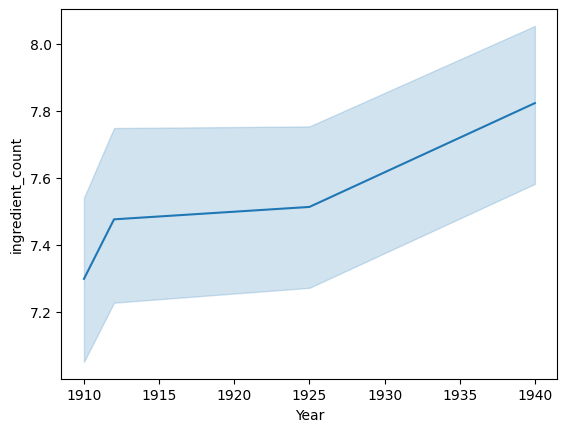

In [64]:
# average+confidence interval cookbook recipes (editions)

sns.lineplot(data=combined_df[combined_df.Year.isin(selected_years)], x='Year', y='ingredient_count', errorbar='ci')

In [65]:
df_new = pd.read_csv('recipe_web.csv')
df_new['year'] = df_new['date'].astype(str).str[:4]
df_new['year'].head()

0    1957
1    1957
2    1957
3    1957
4    1957
Name: year, dtype: object

In [66]:
import seaborn as sns

In [67]:
df_new.describe()
df_new['ingredient_count'] = df_new.Ingredients.apply(lambda x: len(x.split(', ')) if pd.isna(x) == False else x)
df_new
# combin_df.Year.value_counts()

,Unnamed: 0,title,date,doc_url,h,w,identified_language,ocr_score,Ingredients,quant,tags,year,ingredient_count
0,0,volkskrant,1957-07-03,http://resolver.kb.nl/resolve?urn=ABCDDD:01084...,1936,1381,nl,0.914172,"tomaten, kropsla, geraspte, paprika, olie, dil...","een blad , een blaadje , een schaaltje","oven, vegetarisch",1957,29.0
1,1,volkskrant,1957-07-03,http://resolver.kb.nl/resolve?urn=ABCDDD:01084...,747,681,nl,0.913043,"azijn, tomaten, prei, zout, peper en zout, pet...",NaN,NaN,1957,12.0
2,2,volkskrant,1957-07-10,http://resolver.kb.nl/resolve?urn=ABCDDD:01084...,596,611,nl,0.972727,"ui, tomaten, ei, boter, aardappel, zout, peter...",NaN,bakken,1957,11.0
3,3,volkskrant,1957-07-25,http://resolver.kb.nl/resolve?urn=ABCDDD:01084...,1665,1384,nl,0.967337,"sinaasappelsap, melk, sterke koffie, volkorenb...",een halve,oven,1957,23.0
4,4,volkskrant,1957-07-25,http://resolver.kb.nl/resolve?urn=ABCDDD:01084...,954,629,nl,0.864516,"brood, zure room, room, ham, ananas, citroen, ...",NaN,"bakken, hollands",1957,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27406,5932,trouw,1956-04-27,http://resolver.kb.nl/resolve?urn=ABCDDD:01082...,2045,590,nl,0.923810,"vijgen, aardappelmeel, citroensap, zout, witte...","100 gram , 50 gram , 7 dl",NaN,1956,13.0
27407,5933,trouw,1956-05-04,http://resolver.kb.nl/resolve?urn=ABCDDD:01082...,840,579,nl,0.857143,"slasaus, margarine, custardpoeder, aardappelen...","2 blikje , 2 kropjes , 2 kg , 4 dl",oven,1956,8.0
27408,5934,trouw,1956-05-04,http://resolver.kb.nl/resolve?urn=ABCDDD:01082...,1436,580,nl,0.880208,"gember, bruine bonen, rozijnen, krenten, kanee...",4 dl,NaN,1956,12.0
27409,5935,trouw,1956-05-04,http://resolver.kb.nl/resolve?urn=ABCDDD:01082...,166,578,de,0.850000,kaas,NaN,"oven, vegetarisch",1956,1.0


In [68]:
# decade for visualisation newspaper recipes

df_new['10'] = (df_new['year'].astype(int) // 10) * 10

<Axes: xlabel='10', ylabel='ingredient_count'>

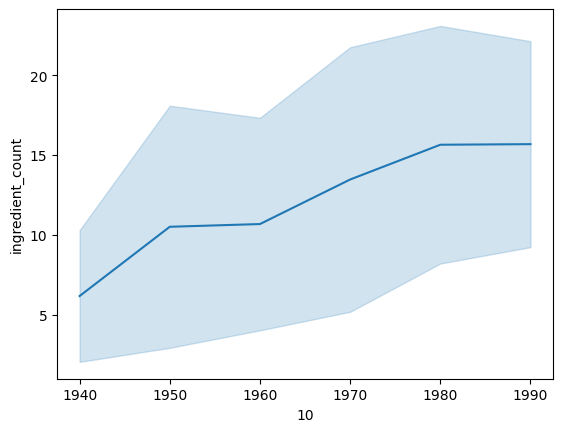

In [69]:
# average+standard deviation newspaper recipes

sns.lineplot(data=df_new, x='10', y='ingredient_count', errorbar='sd')

<Axes: xlabel='10', ylabel='ingredient_count'>

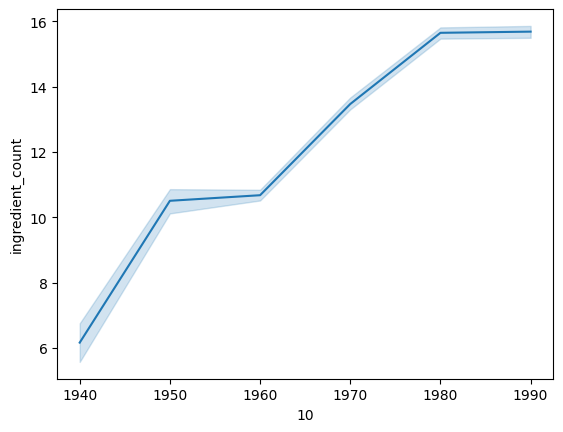

In [62]:
# average+confidence interval newspaper recipes

sns.lineplot(data=df_new, x='10', y='ingredient_count', errorbar='ci')